In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

#root_path = './gdrive/MyDrive/DB_LARC/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Nadam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten, Input, Dense
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [16]:
# Generating new images for the same object

img_rows = 150
img_cols = 150



from keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/gdrive/Shareddrives/DB-LARC/face-base/hispanic_tratado'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split = 0.2)

#validation_datagen = ImageDataGenerator(rescale=1./255)


train_batchsize = 18
val_batchsize = 20

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False,
        subset='validation')

Found 141 images belonging to 19 classes.
Found 22 images belonging to 19 classes.


In [17]:
num_classes = validation_generator.num_classes

inp = Input((img_rows,img_cols,3))


conv1 = Conv2D(64, (5,5), padding='valid', activation= 'relu')(inp)
conv1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv1 = BatchNormalization()(conv1)
conv2 = Conv2D(96, (4,4), padding='valid', activation= 'relu')(conv1)
conv2 = MaxPooling2D(pool_size=(2,2))(conv2)
conv2 = BatchNormalization()(conv2)

conv3 = Conv2D(128, (3,3), padding='valid', activation= 'relu')(conv2)
conv3 = MaxPooling2D(pool_size=(2,2))(conv3)
conv3 = BatchNormalization()(conv3)

conv4 = Conv2D(256, (3,3), padding='valid', activation= 'relu')(conv3)
conv4 = MaxPooling2D(pool_size=(2,2))(conv4)
conv4 = BatchNormalization()(conv4)

flat = Flatten()(conv4)

dense0 = Dense(1024, activation= 'relu')(flat)
dense0 = Dropout(0.5)(flat)
dense1 = Dense(512, activation= 'relu')(dense0)
dense1 = Dropout(0.5)(dense0)
dense2 = Dense(64, activation= 'relu')(dense0)
dense2 = Dropout(0.1)(dense2)

out = Dense(num_classes, activation = 'softmax')(dense2)

model = Model(inp, out)
model.compile(optimizer = Nadam(lr = 0.0001) ,loss = 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 246, 246, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 123, 123, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 123, 123, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 96)      98400     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 96)        384   

In [18]:
 #importing our optimizer

from keras.optimizers import RMSprop

A = model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [19]:
# Treino

epochs = 600
batch_size = 20

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size)



Epoch 1/600
7/7 [==============================] - 63s 5s/step - loss: 4.8213 - accuracy: 0.1034 - val_loss: 4.1453 - val_accuracy: 0.0500
Epoch 2/600
7/7 [==============================] - 1s 166ms/step - loss: 4.7178 - accuracy: 0.1338 - val_loss: 3.0710 - val_accuracy: 0.1000
Epoch 3/600
7/7 [==============================] - 1s 161ms/step - loss: 3.1848 - accuracy: 0.2075 - val_loss: 3.0674 - val_accuracy: 0.1000
Epoch 4/600
7/7 [==============================] - 1s 166ms/step - loss: 2.7157 - accuracy: 0.2366 - val_loss: 3.0743 - val_accuracy: 0.1000
Epoch 5/600
7/7 [==============================] - 1s 160ms/step - loss: 2.9167 - accuracy: 0.2030 - val_loss: 3.1583 - val_accuracy: 0.0000e+00
Epoch 6/600
7/7 [==============================] - 1s 165ms/step - loss: 2.8361 - accuracy: 0.2317 - val_loss: 4.5206 - val_accuracy: 0.0000e+00
Epoch 7/600
7/7 [==============================] - 1s 163ms/step - loss: 2.4874 - accuracy: 0.3722 - val_loss: 4.6294 - val_accuracy: 0.0000e+00
Epo

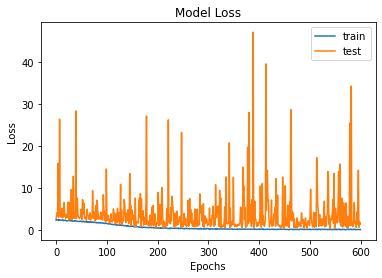

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

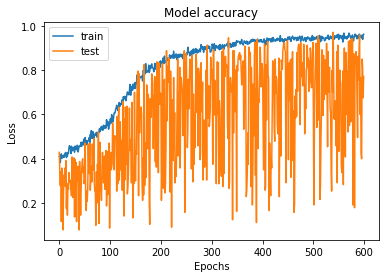

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()




In [ ]:
model.save('./gdrive/Shareddrives/DB-LARC/Modelos/caucasians-tratados_EstruturaFlores_semTL.h5')

In [ ]:
history.history


{'accuracy': [0.4100528955459595,
  0.41644325852394104,
  0.3824843466281891,
  0.4146559536457062,
  0.4223985970020294,
  0.40214475989341736,
  0.4128686189651489,
  0.4057193994522095,
  0.41644325852394104,
  0.41108131408691406,
  0.40750670433044434,
  0.4244861602783203,
  0.4244861602783203,
  0.42895442247390747,
  0.4057193994522095,
  0.41733691096305847,
  0.4128686189651489,
  0.42806077003479004,
  0.4244861602783203,
  0.44885361194610596,
  0.4593386948108673,
  0.4530830979347229,
  0.4441465735435486,
  0.42328041791915894,
  0.456657737493515,
  0.4414655864238739,
  0.4361036717891693,
  0.4504021406173706,
  0.44235923886299133,
  0.45218944549560547,
  0.4298480749130249,
  0.45755138993263245,
  0.4468275308609009,
  0.44593387842178345,
  0.44057193398475647,
  0.4611259996891022,
  0.4593386948108673,
  0.43074172735214233,
  0.44325289130210876,
  0.456657737493515,
  0.456657737493515,
  0.4557640850543976,
  0.46380695700645447,
  0.4745308458805084,
  0.4